In [1]:
#Se importaron las librerías con las que se estará trabajando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st

In [2]:
#Se lee el dataset con el que se estará trabajando y se le llama df
df= pd.read_csv("florida.csv")

In [3]:
#Se eliminan las columnas que no se estarán utilizando para el análisis o que son muy repetitivas en relación a otras variables
df = df.drop(["listing_url","scrape_id","last_scraped","source","name","description","neighborhood_overview",
"host_listings_count","host_total_listings_count",
"picture_url","host_url","host_name","host_since","host_about",
"host_thumbnail_url","host_picture_url","neighbourhood_group_cleansed",
"bathrooms","minimum_minimum_nights","maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights",
"calendar_updated","calendar_last_scraped","number_of_reviews","number_of_reviews_l30d","first_review",
"last_review","license","calculated_host_listings_count_entire_homes",
"calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","neighbourhood"], axis=1)

In [4]:
#Se verifica la eliminación de las columnas
df.columns.values

array(['id', 'host_id', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'instant_bookable', 'calculated_host_listings_count',
       'reviews_per_month'], dtype=object)

In [5]:
#Se elimina el texto de la variable "bathrooms_text" para hacerla cuantitativa, se renombra la variable
df["bathrooms_text"]=df["bathrooms_text"].str.split(" ",1).str[0]
df=df.rename(columns={"bathrooms_text":"bathrooms"})

In [6]:
#Se utiliza la función unique para encontrar el texto existente que se debe reemplazar
df["bathrooms"].unique()

array(['2', '1', '3', '2.5', '3.5', nan, '1.5', '4', '5', '4.5', '0', '8',
       '5.5', '20', '6.5', '6', '7.5', '7', '10', 'Shared', 'Half-bath',
       '17', '9', 'Private', '11.5', '12', '9.5'], dtype=object)

In [7]:
#Se crea un diccionario para reemplazar el texto de la variable
bath_dict={
    "Half-bath":0.5,
    "Shared":0.5,
    "Private":0.5
}

In [8]:
#Se reemplazan los valores del diccionario por numéricos
df=df.replace({"bathrooms":bath_dict})
df["bathrooms"]=df["bathrooms"].str.replace(" ","")

In [9]:
#Se convierte la variable a numérica para poder trabajar con ella
df['bathrooms'] = df['bathrooms'].astype(float)

In [10]:
#Se rellenan los valores nulos de las columnas "host_location" y "host_neighbourhood" con "Unknown" para continuar con el formato del set de datos
df["host_location"]= df["host_location"].fillna("Unknown") 
df["host_neighbourhood"]= df["host_neighbourhood"].fillna("Unknown")

In [11]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                   0
host_id                              0
host_location                        0
host_response_time                1587
host_response_rate                1587
host_acceptance_rate               904
host_is_superhost                    5
host_neighbourhood                   0
host_verifications                   0
host_has_profile_pic                11
host_identity_verified              11
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           21
bedrooms                          1323
beds                               189
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_nights_avg_ntm               0
maximum_nights_avg_ntm   

In [12]:
#Se rellenan los valores nulos de la columna "host_response_time" con "no reviews yet"
df["host_response_time"]= df["host_response_time"].fillna("no reviews yet") 

In [13]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                   0
host_id                              0
host_location                        0
host_response_time                   0
host_response_rate                1587
host_acceptance_rate               904
host_is_superhost                    5
host_neighbourhood                   0
host_verifications                   0
host_has_profile_pic                11
host_identity_verified              11
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           21
bedrooms                          1323
beds                               189
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_nights_avg_ntm               0
maximum_nights_avg_ntm   

In [14]:
#Se rellenan los valores nulos de ambas columnas con 80%
#A pesar de no ser un valor real se selecciona este método para poder obtener un panorama general 
df["host_response_rate"]= df["host_response_rate"].fillna("80%") 
df["host_acceptance_rate"]= df["host_acceptance_rate"].fillna("80%") 

In [15]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                   0
host_id                              0
host_location                        0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    5
host_neighbourhood                   0
host_verifications                   0
host_has_profile_pic                11
host_identity_verified              11
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           21
bedrooms                          1323
beds                               189
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_nights_avg_ntm               0
maximum_nights_avg_ntm   

In [16]:
#Se rellenan los valores nulos de las columnas con "f" porque consideramos que es más probable que no sean superhosts y que por eso no se tenga esa información
df["host_is_superhost"]= df["host_is_superhost"].fillna("f") 
df["host_has_profile_pic"]= df["host_has_profile_pic"].fillna("f")
df["host_identity_verified"]= df["host_identity_verified"].fillna("f") 

In [17]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                   0
host_id                              0
host_location                        0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           21
bedrooms                          1323
beds                               189
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_nights_avg_ntm               0
maximum_nights_avg_ntm   

In [18]:
#Se rellenan los valores nulos de las columnas bathrooms, bedrooms y beds por la moda ya que será útil para el análisis general utilizar el número más repetido
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].mode()[0])
df["beds"] = df["beds"].fillna(df["beds"].mode()[0])
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].mode()[0])

In [19]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                   0
host_id                              0
host_location                        0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_nights_avg_ntm               0
maximum_nights_avg_ntm   

<function matplotlib.pyplot.show(close=None, block=None)>

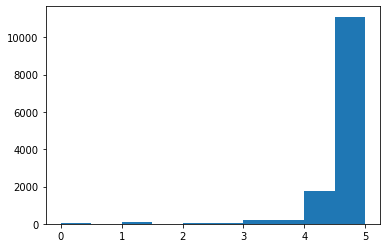

In [20]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_rating"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

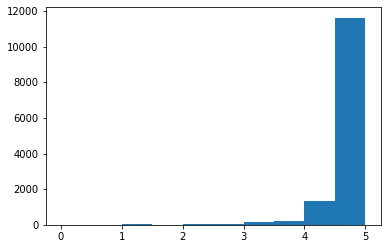

In [21]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_accuracy"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

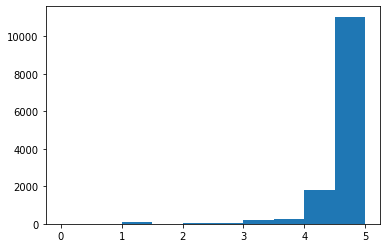

In [22]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_cleanliness"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

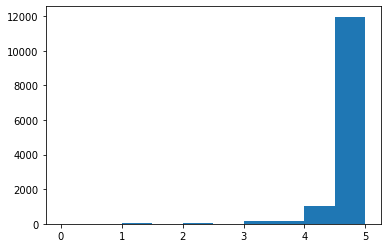

In [23]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_checkin"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

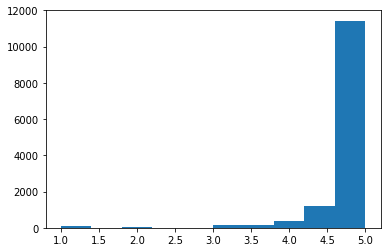

In [24]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_communication"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

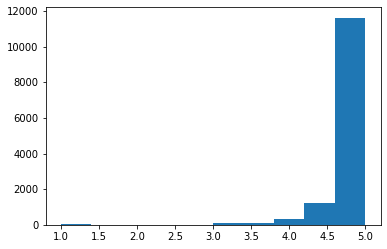

In [25]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_location"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

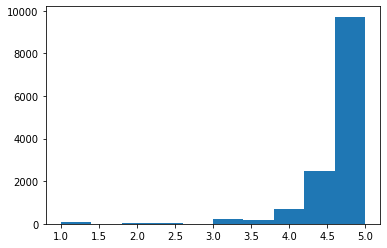

In [26]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_value"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

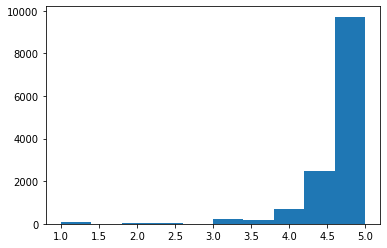

In [27]:
#Se grafica un histograma con los datos de la columna para observar si los datos están distribuidos de manera normal
#Se observa que no están distribuidos de manera normal
plt.hist(df["review_scores_value"])
plt.show

In [28]:
#Se rellenan los valores de las columnas indicadas por la mediana ya que los datos están sezgados hacia la derecha, como es visto en los histogramas 
df["review_scores_rating"]=df["review_scores_rating"].fillna(round(df["review_scores_rating"].median(),2))
df["review_scores_accuracy"]=df["review_scores_accuracy"].fillna(round(df["review_scores_accuracy"].median(),2))
df["review_scores_cleanliness"]=df["review_scores_cleanliness"].fillna(round(df["review_scores_cleanliness"].median(),2))
df["review_scores_checkin"]=df["review_scores_checkin"].fillna(round(df["review_scores_checkin"].median(),2))
df["review_scores_communication"]=df["review_scores_communication"].fillna(round(df["review_scores_communication"].median(),2))
df["review_scores_location"]=df["review_scores_location"].fillna(round(df["review_scores_location"].median(),2))
df["review_scores_value"]=df["review_scores_value"].fillna(round(df["review_scores_value"].median(),2))

In [29]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                   0
host_id                              0
host_location                        0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
minimum_nights_avg_ntm               0
maximum_nights_avg_ntm   

In [30]:
#Se rellenan los valores nulos por 0 ya que al observar el dataset y compararlo con otras columnas los valores nulos generalmente están en los registros en los que no hay reseñas.
# Por ende, se asume que no se han hecho reseñas y que no tienen ninguna reseña por mes 
df["reviews_per_month"]= df["reviews_per_month"].fillna("0") 

In [31]:
#Identificar valores nulos
null=df.isnull().sum()
null

id                                0
host_id                           0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm            0
has_availability                  0
availability_30             

In [32]:
#Asegurar que ya no hay datos nulos en toda la base de datos
total_null= df.isnull().sum().sum()
total_null

0

In [33]:
df.dtypes

id                                  int64
host_id                             int64
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
amenities                          object
price                              object
minimum_nights                      int64
maximum_nights                    

In [34]:
#Se eliminan los signos de % de las columnas para que sean numéricas
df["host_response_rate"]=df["host_response_rate"].str.rstrip("%").astype("float")/100.0
df["host_acceptance_rate"]=df["host_acceptance_rate"].str.rstrip("%").astype("float")/100.0

In [35]:
#Se transforma la variable de precio a numérica quitando los signos de pesos y las comas. 
df["price"] = df["price"].str.replace('$', '')
df["price"]= df["price"].replace(',','', regex=True)
df["price"] = pd.to_numeric(df["price"])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_25860/2004568266.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"] = df["price"].str.replace('$', '')


In [36]:
#Cambiamos el tipo de dato a numérico
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"])

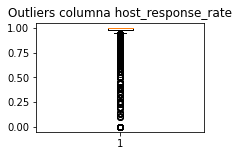

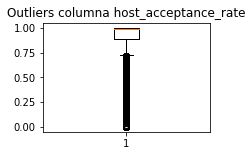

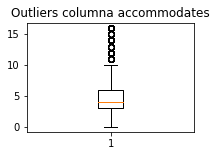

In [37]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["host_response_rate"]) 
plt.title("Outliers columna host_response_rate")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["host_acceptance_rate"]) 
plt.title("Outliers columna host_acceptance_rate")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["accommodates"]) 
plt.title("Outliers columna accommodates")
plt.show() 

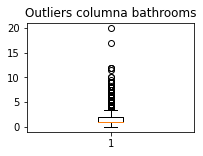

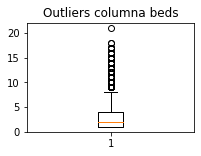

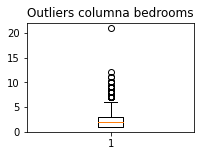

In [38]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["bathrooms"]) 
plt.title("Outliers columna bathrooms")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["beds"]) 
plt.title("Outliers columna beds")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["bedrooms"]) 
plt.title("Outliers columna bedrooms")
plt.show() 

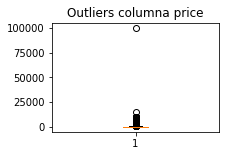

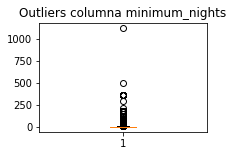

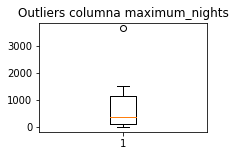

In [39]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["price"]) 
plt.title("Outliers columna price")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["minimum_nights"]) 
plt.title("Outliers columna minimum_nights")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["maximum_nights"]) 
plt.title("Outliers columna maximum_nights")
plt.show() 

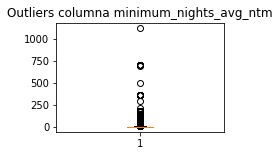

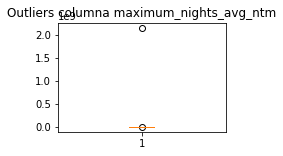

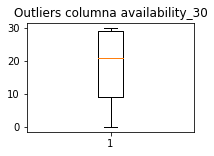

In [40]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas excepto en la de disponibilidad 30
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["minimum_nights_avg_ntm"]) 
plt.title("Outliers columna minimum_nights_avg_ntm")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["maximum_nights_avg_ntm"]) 
plt.title("Outliers columna maximum_nights_avg_ntm")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["availability_30"]) 
plt.title("Outliers columna availability_30")
plt.show() 

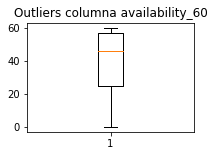

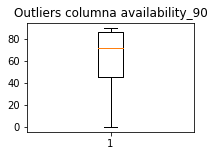

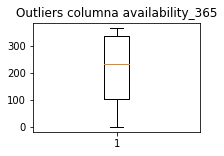

In [41]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que no hay valores atípicos
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["availability_60"]) 
plt.title("Outliers columna availability_60")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["availability_90"]) 
plt.title("Outliers columna availability_90")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["availability_365"]) 
plt.title("Outliers columna availability_365")
plt.show() 

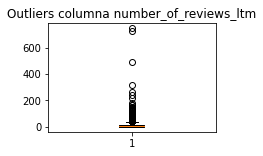

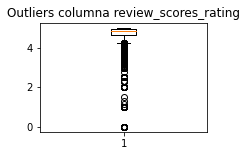

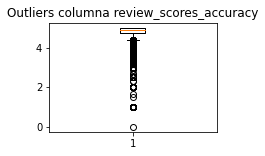

In [42]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas, de cualquier manera, se tomo la decisión de no reemplazar los valores atípicos de las variables de 
#reviews ya que están en el rango del 1-5
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["number_of_reviews_ltm"]) 
plt.title("Outliers columna number_of_reviews_ltm")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_rating"]) 
plt.title("Outliers columna review_scores_rating")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_accuracy"]) 
plt.title("Outliers columna review_scores_accuracy")
plt.show() 

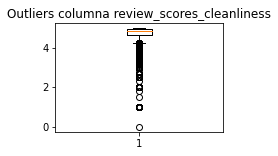

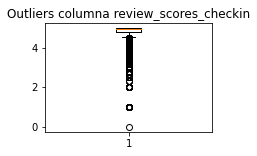

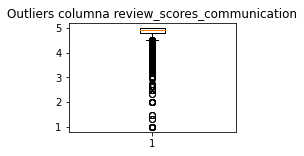

In [43]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas, de cualquier manera, se tomo la decisión de no reemplazar los valores atípicos de las variables de 
#reviews ya que están en el rango del 1-5
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_cleanliness"]) 
plt.title("Outliers columna review_scores_cleanliness")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_checkin"]) 
plt.title("Outliers columna review_scores_checkin")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_communication"]) 
plt.title("Outliers columna review_scores_communication")
plt.show() 

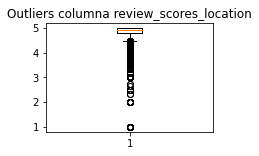

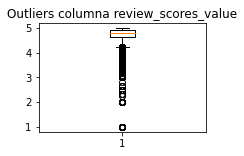

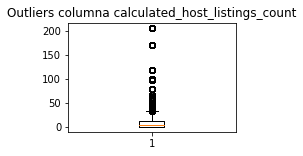

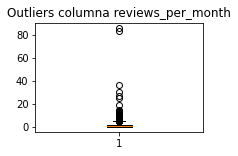

In [44]:
#Realizamos diagramas de caja para identificar outliers, a través de los diagramas se puede observar que hay valores atípicos
#en todas las columnas, de cualquier manera, se tomo la decisión de no reemplazar los valores atípicos de las variables de 
#reviews ya que están en el rango del 1-5
fig1 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_location"]) 
plt.title("Outliers columna review_scores_location")
plt.show() 


fig2 = plt.figure(figsize =(3, 2))
plt.boxplot(df["review_scores_value"]) 
plt.title("Outliers columna review_scores_value")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.boxplot(df["calculated_host_listings_count"]) 
plt.title("Outliers columna calculated_host_listings_count")
plt.show() 

fig4 = plt.figure(figsize =(3, 2))
plt.boxplot(df["reviews_per_month"]) 
plt.title("Outliers columna reviews_per_month")
plt.show() 

In [45]:
#A través de investigación se encontró que el método más efectivo para detectar valores atípicos es el rango intercuartil.
#Asimismo, se encontró que se definen como atípicos los valores que son mayores a 1.5 IQR debajo del primer cuartil o arriba del tercer cuartil,
#Por ende, decidimos utilizar ese rango
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_1=df["host_response_rate"]

percentile25_1=y_1.quantile(0.25) #Q1
percentile75_1=y_1.quantile(0.75) #Q3
iqr_1= percentile75_1 - percentile25_1

limite_superior_iqr_1= percentile75_1 + 1.5*iqr_1
limite_inferior_iqr_1= percentile25_1 - 1.5*iqr_1
print("Limite superior permitido", limite_superior_iqr_1)
print("Limite inferior permitido", limite_inferior_iqr_1)

Limite superior permitido 1.03
Limite inferior permitido 0.95


In [46]:
#Identificar outliers
outliers_iqr_1= df[(y_1>limite_superior_iqr_1)|(y_1<limite_inferior_iqr_1)]
outliers_iqr_1
len(outliers_iqr_1)

3473

In [47]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_2=df["host_acceptance_rate"]

percentile25_2=y_2.quantile(0.25) #Q1
percentile75_2=y_2.quantile(0.75) #Q3
iqr_2= percentile75_2 - percentile25_2

limite_superior_iqr_2= percentile75_2 + 1.5*iqr_2
limite_inferior_iqr_2= percentile25_2 - 1.5*iqr_2
print("Limite superior permitido", limite_superior_iqr_2)
print("Limite inferior permitido", limite_inferior_iqr_2)

Limite superior permitido 1.165
Limite inferior permitido 0.7250000000000001


In [48]:
#Identificar outliers
outliers_iqr_2= df[(y_2>limite_superior_iqr_2)|(y_2<limite_inferior_iqr_2)]
outliers_iqr_2
len(outliers_iqr_2)

1837

In [49]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_3=df["accommodates"]

percentile25_3=y_3.quantile(0.25) #Q1
percentile75_3=y_3.quantile(0.75) #Q3
iqr_3= percentile75_3 - percentile25_3

limite_superior_iqr_3= percentile75_3 + 1.5*iqr_3
limite_inferior_iqr_3= percentile25_3 - 1.5*iqr_3
print("Limite superior permitido", limite_superior_iqr_3)
print("Limite inferior permitido", limite_inferior_iqr_3)

Limite superior permitido 10.5
Limite inferior permitido -1.5


In [50]:
#Identificar outliers
outliers_iqr_3= df[(y_3>limite_superior_iqr_3)|(y_3<limite_inferior_iqr_3)]
outliers_iqr_3
len(outliers_iqr_3)

907

In [51]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_4=df["bathrooms"]

percentile25_4=y_4.quantile(0.25) #Q1
percentile75_4=y_4.quantile(0.75) #Q3
iqr_4= percentile75_4 - percentile25_4

limite_superior_iqr_4= percentile75_4 + 1.5*iqr_4
limite_inferior_iqr_4= percentile25_4 - 1.5*iqr_4
print("Limite superior permitido", limite_superior_iqr_4)
print("Limite inferior permitido", limite_inferior_iqr_4)

Limite superior permitido 3.5
Limite inferior permitido -0.5


In [52]:
#Identificar outliers
outliers_iqr_4= df[(y_4>limite_superior_iqr_4)|(y_4<limite_inferior_iqr_4)]
outliers_iqr_4
len(outliers_iqr_4)

651

In [53]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_5=df["beds"]

percentile25_5=y_5.quantile(0.25) #Q1
percentile75_5=y_5.quantile(0.75) #Q3
iqr_5= percentile75_5 - percentile25_5

limite_superior_iqr_5= percentile75_5 + 1.5*iqr_5
limite_inferior_iqr_5= percentile25_5 - 1.5*iqr_5
print("Limite superior permitido", limite_superior_iqr_5)
print("Limite inferior permitido", limite_inferior_iqr_5)

Limite superior permitido 8.5
Limite inferior permitido -3.5


In [54]:
#Identificar outliers
outliers_iqr_5= df[(y_5>limite_superior_iqr_5)|(y_5<limite_inferior_iqr_5)]
outliers_iqr_5
len(outliers_iqr_5)

366

In [55]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_6=df["bedrooms"]

percentile25_6=y_6.quantile(0.25) #Q1
percentile75_6=y_6.quantile(0.75) #Q3
iqr_6= percentile75_6 - percentile25_6

limite_superior_iqr_6= percentile75_6 + 1.5*iqr_6
limite_inferior_iqr_6= percentile25_6 - 1.5*iqr_6
print("Limite superior permitido", limite_superior_iqr_6)
print("Limite inferior permitido", limite_inferior_iqr_6)

Limite superior permitido 6.0
Limite inferior permitido -2.0


In [56]:
#Identificar outliers
outliers_iqr_6= df[(y_6>limite_superior_iqr_6)|(y_6<limite_inferior_iqr_6)]
outliers_iqr_6
len(outliers_iqr_6)

149

In [57]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_7=df["price"]

percentile25_7=y_7.quantile(0.25) #Q1
percentile75_7=y_7.quantile(0.75) #Q3
iqr_7= percentile75_7 - percentile25_7

limite_superior_iqr_7= percentile75_7 + 1.5*iqr_7
limite_inferior_iqr_7= percentile25_7 - 1.5*iqr_7
print("Limite superior permitido", limite_superior_iqr_7)
print("Limite inferior permitido", limite_inferior_iqr_7)

Limite superior permitido 485.0
Limite inferior permitido -147.0


In [58]:
#Identificar outliers
outliers_iqr_7= df[(y_7>limite_superior_iqr_7)|(y_7<limite_inferior_iqr_7)]
outliers_iqr_7
len(outliers_iqr_7)

1312

In [59]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_8=df["minimum_nights"]

percentile25_8=y_8.quantile(0.25) #Q1
percentile75_8=y_8.quantile(0.75) #Q3
iqr_8= percentile75_8 - percentile25_8

limite_superior_iqr_8= percentile75_8 + 1.5*iqr_8
limite_inferior_iqr_8= percentile25_8 - 1.5*iqr_8
print("Limite superior permitido", limite_superior_iqr_8)
print("Limite inferior permitido", limite_inferior_iqr_8)

Limite superior permitido 8.5
Limite inferior permitido -3.5


In [60]:
#Identificar outliers
outliers_iqr_8= df[(y_8>limite_superior_iqr_8)|(y_8<limite_inferior_iqr_8)]
outliers_iqr_8
len(outliers_iqr_8)

1258

In [61]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_9=df["maximum_nights"]

percentile25_9=y_9.quantile(0.25) #Q1
percentile75_9=y_9.quantile(0.75) #Q3
iqr_9= percentile75_9 - percentile25_9

limite_superior_iqr_9= percentile75_9 + 1.5*iqr_9
limite_inferior_iqr_9= percentile25_9 - 1.5*iqr_9
print("Limite superior permitido", limite_superior_iqr_9)
print("Limite inferior permitido", limite_inferior_iqr_9)

Limite superior permitido 2677.5
Limite inferior permitido -1462.5


In [62]:
#Identificar outliers
outliers_iqr_9= df[(y_9>limite_superior_iqr_9)|(y_9<limite_inferior_iqr_9)]
outliers_iqr_9
len(outliers_iqr_9)

1

In [63]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_10=df["minimum_nights_avg_ntm"]

percentile25_10=y_10.quantile(0.25) #Q1
percentile75_10=y_10.quantile(0.75) #Q3
iqr_10= percentile75_10 - percentile25_10

limite_superior_iqr_10= percentile75_10 + 1.5*iqr_10
limite_inferior_iqr_10= percentile25_10 - 1.5*iqr_10
print("Limite superior permitido", limite_superior_iqr_10)
print("Limite inferior permitido", limite_inferior_iqr_10)

Limite superior permitido 9.6
Limite inferior permitido -3.1999999999999997


In [64]:
#Identificar outliers
outliers_iqr_10= df[(y_10>limite_superior_iqr_10)|(y_10<limite_inferior_iqr_10)]
outliers_iqr_10
len(outliers_iqr_10)

1487

In [65]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_11=df["maximum_nights_avg_ntm"]

percentile25_11=y_11.quantile(0.25) #Q1
percentile75_11=y_11.quantile(0.75) #Q3
iqr_11= percentile75_11 - percentile25_11

limite_superior_iqr_11= percentile75_11 + 1.5*iqr_11
limite_inferior_iqr_11= percentile25_11 - 1.5*iqr_11
print("Limite superior permitido", limite_superior_iqr_11)
print("Limite inferior permitido", limite_inferior_iqr_11)

Limite superior permitido 2265.0
Limite inferior permitido -775.0


In [66]:
#Identificar outliers
outliers_iqr_11= df[(y_11>limite_superior_iqr_11)|(y_11<limite_inferior_iqr_11)]
outliers_iqr_11
len(outliers_iqr_11)

2

In [67]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_12=df["number_of_reviews_ltm"]

percentile25_12=y_12.quantile(0.25) #Q1
percentile75_12=y_12.quantile(0.75) #Q3
iqr_12= percentile75_12 - percentile25_12

limite_superior_iqr_12= percentile75_12 + 1.5*iqr_12
limite_inferior_iqr_12= percentile25_12 - 1.5*iqr_12
print("Limite superior permitido", limite_superior_iqr_12)
print("Limite inferior permitido", limite_inferior_iqr_12)

Limite superior permitido 40.0
Limite inferior permitido -24.0


In [68]:
#Identificar outliers
outliers_iqr_12= df[(y_12>limite_superior_iqr_12)|(y_12<limite_inferior_iqr_12)]
outliers_iqr_12
len(outliers_iqr_12)

877

In [69]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR 
y_13=df["calculated_host_listings_count"]

percentile25_13=y_13.quantile(0.25) #Q1
percentile75_13=y_13.quantile(0.75) #Q3
iqr_13= percentile75_13 - percentile25_13

limite_superior_iqr_13= percentile75_13 + 1.5*iqr_13
limite_inferior_iqr_13= percentile25_13 - 1.5*iqr_13
print("Limite superior permitido", limite_superior_iqr_13)
print("Limite inferior permitido", limite_inferior_iqr_13)

Limite superior permitido 33.5
Limite inferior permitido -18.5


In [70]:
#Identificar outliers
outliers_iqr_13= df[(y_13>limite_superior_iqr_13)|(y_13<limite_inferior_iqr_13)]
outliers_iqr_13
len(outliers_iqr_13)

1947

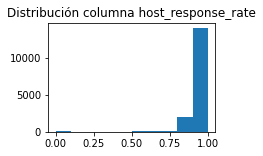

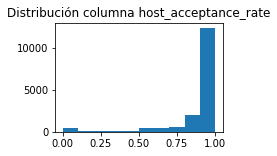

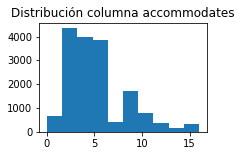

In [71]:
#Se decidió sustituir ciertas variables con la moda, de las que restan se graficarán histogramas para saber
#si se sigue la distribución normal para sustituir con promedios
#Para la columna de accommodates se encuentra distribución relativamente normal
fig1 = plt.figure(figsize =(3, 2))
plt.hist(df["host_response_rate"])
plt.title("Distribución columna host_response_rate")
plt.show() 

fig2 = plt.figure(figsize =(3, 2))
plt.hist(df["host_acceptance_rate"])
plt.title("Distribución columna host_acceptance_rate")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.hist(df["accommodates"])
plt.title("Distribución columna accommodates")
plt.show() 

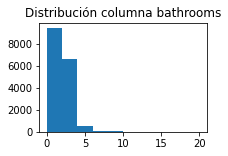

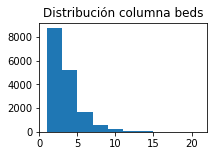

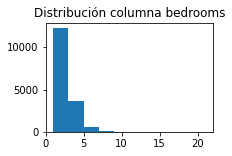

In [72]:
fig1 = plt.figure(figsize =(3, 2))
plt.hist(df["bathrooms"])
plt.title("Distribución columna bathrooms")
plt.show() 

fig2 = plt.figure(figsize =(3, 2))
plt.hist(df["beds"])
plt.title("Distribución columna beds")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.hist(df["bedrooms"])
plt.title("Distribución columna bedrooms")
plt.show() 

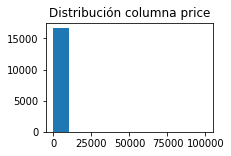

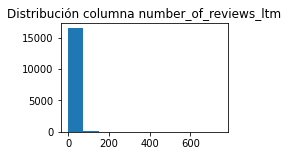

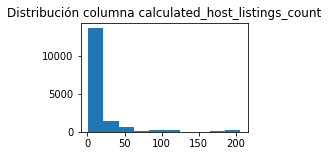

In [73]:
fig1 = plt.figure(figsize =(3, 2))
plt.hist(df["price"])
plt.title("Distribución columna price")
plt.show() 

fig2 = plt.figure(figsize =(3, 2))
plt.hist(df["number_of_reviews_ltm"])
plt.title("Distribución columna number_of_reviews_ltm")
plt.show() 

fig3 = plt.figure(figsize =(3, 2))
plt.hist(df["calculated_host_listings_count"])
plt.title("Distribución columna calculated_host_listings_count")
plt.show() 

In [74]:
#Se obtiene la mediana para poder sustituir los valores atípicos
st.median(df.bathrooms)

1.0

In [75]:
#Se sustituyen los valores atípicos
df["bathrooms"] = np.where(((df["bathrooms"]>limite_superior_iqr_4)|(df["bathrooms"]<limite_inferior_iqr_4)),1,df['bathrooms'])

In [76]:
#Comprobar que se sustituyeron los outliers
outliers1= df[(df["bathrooms"]>limite_superior_iqr_4)|(df["bathrooms"]<limite_inferior_iqr_4)]
outliers1

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [77]:
#Se obtiene la mediana para poder sustituir los valores atípicos
st.median(df.beds)

2.0

In [78]:
#Se sustituyen los valores atípicos
df["beds"] = np.where(((df["beds"]>limite_superior_iqr_5)|(df["beds"]<limite_inferior_iqr_5)),2,df['beds'])

In [79]:
#Comprobar que se sustituyeron los outliers
outliers2= df[(df["beds"]>limite_superior_iqr_5)|(df["beds"]<limite_inferior_iqr_5)]
outliers2

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [80]:
#Se obtiene la mediana para poder sustituir los valores atípicos
st.median(df.bedrooms)

2.0

In [81]:
#Se sustituyen los valores atípicos
df["bedrooms"] = np.where(((df["bedrooms"]>limite_superior_iqr_6)|(df["bedrooms"]<limite_inferior_iqr_6)),2,df['bedrooms'])

In [82]:
#Comprobar que se sustituyeron los outliers
outliers3= df[(df["bedrooms"]>limite_superior_iqr_6)|(df["bedrooms"]<limite_inferior_iqr_6)]
outliers3

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [83]:
#Se obtiene la mediana para poder sustituir los valores atípicos
st.median(df.price)

150.0

In [84]:
#Se sustituyen los valores atípicos
df["price"] = np.where(((df["price"]>limite_superior_iqr_7)|(df["price"]<limite_inferior_iqr_7)),150,df['price'])

In [85]:
#Comprobar que se sustituyeron los outliers
outliers4= df[(df["price"]>limite_superior_iqr_7)|(df["price"]<limite_inferior_iqr_7)]
outliers4

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [86]:
#Se obtiene la moda para poder sustituir los valores atípicos
st.mode(df.minimum_nights)

1

In [87]:
#Se sustituyen los valores atípicos
df["minimum_nights"] = np.where(((df["minimum_nights"]>limite_superior_iqr_8)|(df["minimum_nights"]<limite_inferior_iqr_8)),1,df['minimum_nights'])

In [88]:
#Comprobar que se sustituyeron los outliers
outliers5= df[(df["minimum_nights"]>limite_superior_iqr_8)|(df["minimum_nights"]<limite_inferior_iqr_8)]
outliers5

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [89]:
#Se obtiene la moda para poder sustituir los valores atípicos
st.mode(df.maximum_nights)

1125

In [90]:
#Se sustituyen los valores atípicos
df["maximum_nights"] = np.where(((df["maximum_nights"]>limite_superior_iqr_9)|(df["maximum_nights"]<limite_inferior_iqr_9)),1125,df['maximum_nights'])

In [91]:
#Comprobar que se sustituyeron los outliers
outliers6= df[(df["maximum_nights"]>limite_superior_iqr_9)|(df["maximum_nights"]<limite_inferior_iqr_9)]
outliers6

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [92]:
#Se obtiene la moda para poder sustituir los valores atípicos
st.mode(df.minimum_nights_avg_ntm)

1.0

In [93]:
#Se sustituyen los valores atípicos
df["minimum_nights_avg_ntm"] = np.where(((df["minimum_nights_avg_ntm"]>limite_superior_iqr_10)|(df["minimum_nights_avg_ntm"]<limite_inferior_iqr_10)),1,df['minimum_nights_avg_ntm'])

In [94]:
#Comprobar que se sustituyeron los outliers
outliers7= df[(df["minimum_nights_avg_ntm"]>limite_superior_iqr_10)|(df["minimum_nights_avg_ntm"]<limite_inferior_iqr_10)]
outliers7

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [95]:
#Se obtiene la moda para poder sustituir los valores atípicos
st.mode(df.maximum_nights_avg_ntm)

1125.0

In [96]:
#Se sustituyen los valores atípicos
df["maximum_nights_avg_ntm"] = np.where(((df["maximum_nights_avg_ntm"]>limite_superior_iqr_11)|(df["maximum_nights_avg_ntm"]<limite_inferior_iqr_11)),1125,df['maximum_nights_avg_ntm'])

In [97]:
#Comprobar que se sustituyeron los outliers
outliers8= df[(df["maximum_nights_avg_ntm"]>limite_superior_iqr_11)|(df["maximum_nights_avg_ntm"]<limite_inferior_iqr_11)]
outliers8

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [98]:
#Se obtiene la moda para poder sustituir los valores atípicos
st.mode(df.host_response_rate)

1.0

In [99]:
#Se sustituyen los valores atípicos
df["host_response_rate"] = np.where(((df["host_response_rate"]>limite_superior_iqr_1)|(df["host_response_rate"]<limite_inferior_iqr_1)),1,df['host_response_rate'])

In [100]:
#Comprobar que se sustituyeron los outliers
outliers9= df[(df["host_response_rate"]>limite_superior_iqr_1)|(df["host_response_rate"]<limite_inferior_iqr_1)]
outliers9

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [101]:
#Se obtiene la moda para poder sustituir los valores atípicos
st.mode(df.host_acceptance_rate)

1.0

In [102]:
#Se sustituyen los valores atípicos
df["host_acceptance_rate"] = np.where(((df["host_acceptance_rate"]>limite_superior_iqr_2)|(df["host_acceptance_rate"]<limite_inferior_iqr_2)),1,df['host_acceptance_rate'])

In [103]:
#Comprobar que se sustituyeron los outliers
outliers10= df[(df["host_acceptance_rate"]>limite_superior_iqr_2)|(df["host_acceptance_rate"]<limite_inferior_iqr_2)]
outliers10

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [104]:
#Se obtiene la media recortada con límites de 0.25 para poder sustituir los valores atípicos
stats.trim_mean(df.accommodates, 0.25)

4.630199567203655

In [105]:
#Se sustituyen los valores atípicos
df["accommodates"] = np.where(((df["accommodates"]>limite_superior_iqr_3)|(df["accommodates"]<limite_inferior_iqr_3)),5,df['accommodates'])

In [106]:
#Comprobar que se sustituyeron los outliers
outliers11= df[(df["accommodates"]>limite_superior_iqr_3)|(df["accommodates"]<limite_inferior_iqr_3)]
outliers11

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [107]:
#Se obtiene la media recortada con límites de 0.25 para poder sustituir los valores atípicos
stats.trim_mean(df.number_of_reviews_ltm, 0.25)

5.797307044962731

In [108]:
#Se sustituyen los valores atípicos
df["number_of_reviews_ltm"] = np.where(((df["number_of_reviews_ltm"]>limite_superior_iqr_12)|(df["number_of_reviews_ltm"]<limite_inferior_iqr_12)),6,df['number_of_reviews_ltm'])

In [109]:
#Comprobar que se sustituyeron los outliers
outliers12= df[(df["number_of_reviews_ltm"]>limite_superior_iqr_12)|(df["number_of_reviews_ltm"]<limite_inferior_iqr_12)]
outliers12

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [110]:
#Se obtiene la media recortada con límites de 0.25 para poder sustituir los valores atípicos
stats.trim_mean(df.calculated_host_listings_count, 0.25)

4.8942053378215915

In [111]:
#Se sustituyen los valores atípicos
df["calculated_host_listings_count"] = np.where(((df["calculated_host_listings_count"]>limite_superior_iqr_13)|(df["calculated_host_listings_count"]<limite_inferior_iqr_13)),5,df['calculated_host_listings_count'])

In [112]:
#Comprobar que se sustituyeron los outliers
outliers13= df[(df["calculated_host_listings_count"]>limite_superior_iqr_13)|(df["calculated_host_listings_count"]<limite_inferior_iqr_13)]
outliers13

,id,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month


In [113]:
#Convertir base de datos limpia a csv
df.to_csv("datosfinalesfl.csv")

In [116]:
import seaborn as sns

In [120]:
dfn= df[["host_response_rate","host_acceptance_rate","accommodates","bathrooms","bedrooms","beds","minimum_nights",
"maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm","availability_30","availability_60","availability_90",
"availability_365","number_of_reviews_ltm","review_scores_rating","review_scores_accuracy","review_scores_cleanliness",
"review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","calculated_host_listings_count",
"reviews_per_month"]]
dfn


,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,1.00,0.83,8,2.0,4.0,5.0,3,365,2.9,1125.0,...,12,4.97,5.00,4.91,5.00,5.00,4.73,4.91,2,1.16
1,1.00,0.92,8,2.0,3.0,4.0,3,60,3.1,60.0,...,13,4.81,4.68,4.71,4.87,5.00,4.68,4.65,2,0.60
2,1.00,0.99,8,2.0,2.0,4.0,2,365,1.0,253.9,...,0,4.83,4.88,4.83,4.94,4.93,4.90,4.78,13,0.00
3,1.00,0.99,8,2.0,2.0,4.0,2,1125,1.0,253.9,...,0,4.83,4.88,4.83,4.94,4.93,4.90,4.78,13,0.00
4,1.00,0.98,4,1.0,1.0,2.0,1,30,1.0,30.0,...,25,4.82,4.89,4.82,4.98,4.96,4.84,4.88,1,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16629,1.00,0.96,2,1.0,1.0,1.0,1,365,1.0,365.0,...,5,4.61,4.61,4.44,4.72,4.67,4.89,4.61,6,0.51
16630,1.00,1.00,4,1.5,1.0,3.0,2,1125,2.0,1125.0,...,23,5.00,5.00,4.87,4.91,5.00,5.00,4.87,1,2.57
16631,1.00,1.00,2,1.0,1.0,1.0,1,365,4.2,318.1,...,0,4.83,4.88,4.83,4.94,4.93,4.90,4.78,2,0.00
16632,0.98,1.00,6,2.0,2.0,3.0,2,1125,2.0,1125.0,...,8,5.00,5.00,5.00,4.88,5.00,5.00,4.88,7,2.33


In [123]:
#Encontramos todas las correlaciones entre las variables 
correlacion=dfn.corr()
correlacion

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_response_rate,1.000000,-0.025031,-0.059593,-0.054043,-0.041239,-0.055503,0.044233,0.036634,0.016037,0.048827,...,0.005393,0.038563,0.042017,0.039428,0.049155,0.061000,0.010541,0.050791,-0.142965,-0.000819
host_acceptance_rate,-0.025031,1.000000,0.043971,-0.011153,0.018865,0.033842,-0.033710,0.002362,-0.004705,0.080030,...,0.124954,0.015436,0.003181,-0.001954,-0.005723,-0.004523,-0.021498,-0.005818,0.107835,0.138860
accommodates,-0.059593,0.043971,1.000000,0.612476,0.715715,0.749266,0.177419,0.065197,0.204665,0.050492,...,0.042857,0.038329,0.030942,0.010354,0.024450,0.024979,0.021585,0.013445,-0.015882,-0.002076
bathrooms,-0.054043,-0.011153,0.612476,1.000000,0.629524,0.569377,0.152977,0.050226,0.173961,0.041347,...,-0.003561,0.049967,0.048141,0.029667,0.035674,0.032667,0.033178,0.037306,-0.021197,-0.037101
bedrooms,-0.041239,0.018865,0.715715,0.629524,1.000000,0.755618,0.143851,0.047556,0.166376,0.036210,...,0.035817,0.075342,0.066583,0.055918,0.082124,0.063885,0.024248,0.055241,-0.053735,0.001870
beds,-0.055503,0.033842,0.749266,0.569377,0.755618,1.000000,0.156520,0.063185,0.171252,0.056515,...,0.042651,0.046780,0.036947,0.022367,0.030909,0.034614,0.024711,0.025714,-0.036259,0.000339
minimum_nights,0.044233,-0.033710,0.177419,0.152977,0.143851,0.156520,1.000000,0.049684,0.799854,0.011866,...,-0.010306,0.038471,0.035997,0.019578,0.011818,0.022027,0.055481,0.033177,-0.076325,-0.129955
maximum_nights,0.036634,0.002362,0.065197,0.050226,0.047556,0.063185,0.049684,1.000000,0.017311,0.560713,...,0.085938,-0.007560,-0.004028,-0.017284,-0.010205,-0.013530,0.007202,-0.015439,-0.050974,-0.001827
minimum_nights_avg_ntm,0.016037,-0.004705,0.204665,0.173961,0.166376,0.171252,0.799854,0.017311,1.000000,-0.018512,...,0.007833,0.034132,0.027583,0.006600,-0.000642,0.007506,0.054306,0.015855,0.009090,-0.094886
maximum_nights_avg_ntm,0.048827,0.080030,0.050492,0.041347,0.036210,0.056515,0.011866,0.560713,-0.018512,1.000000,...,0.201633,0.032478,0.028161,0.014985,0.022222,0.023872,-0.001435,0.020766,-0.009685,0.132342


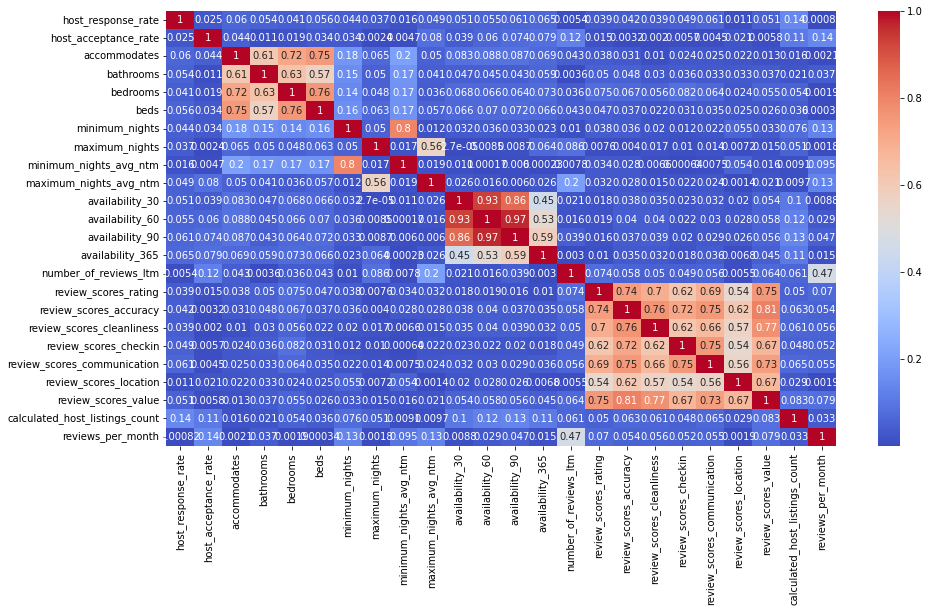

In [126]:
#A partir de este diagrmaa de calor es posible identificar correlaciones entre variables que serán exploradas a mayor profundidad en 
#el siguiente software que será utilizado. 
factores= abs(correlacion)
plt.figure(figsize=(15,8))
heat_map=sns.heatmap(factores,cmap="coolwarm",annot=True)